### Challenge: sentiment analysis with Naive bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

Firtst lets load the data that we want work with.

In [77]:
amazon_data = pd.read_csv('amazon_cells_labelled.txt',delimiter= '\t', header= None)
amazon_data.columns = ['Reviews', 'Positive_negative']

In [78]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
amazon_data.head(50)

,Reviews,Positive_negative
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


Lets explore our data

In [7]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Reviews              1000 non-null object
Positive_negative    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


we dont have any missing value

Now lets see the proportions of positive and negative reviews in our data

In [10]:
amazon_data['Positive_negative'].value_counts()/1000

1    0.5
0    0.5
Name: Positive_negative, dtype: float64

we can see from the above result that there are equal numbers of postive and negative reviews

Lets move on and create features for our data for developing our model of identifying a positive and a negative reviews.

lets begin by creating the possible keywords for positive reviews;

In [123]:
keywords = ['excellent','good', 'great', 'impressive', 'amazing', 'loved' 
            , 'recommend', 'nice', 'best', 'beautiful', 'happy']

by observing and going through the messages in our data, i learned that the keywords that i have listed in the above are written in a different capitalization.some are capitalized and some are not.keeping that in mind lets create our feature variables for creating our new modelling data.Since our original data is labelled our target variable is known and it is the 'positive_negative' variable in the amazon_data dataset.

In [124]:
import re
for key in keywords:
    amazon_data[key] = amazon_data.Reviews.apply(lambda x: bool(re.search(r'{}'.format(key), x, re.IGNORECASE)))

In [92]:
amazon_data.head(50)

,Reviews,Positive_negative,excellent,good,great,impressive,amazing,loved,recommended,nice,best,beautiful,happy
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,True,True,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,True,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,True,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up right to get decent volume.,0,False,False,False,False,False,False,False,False,False,False,False
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0,False,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False,False,False,False,False


So now lets check if the features are independent using seabors's heatmap function.

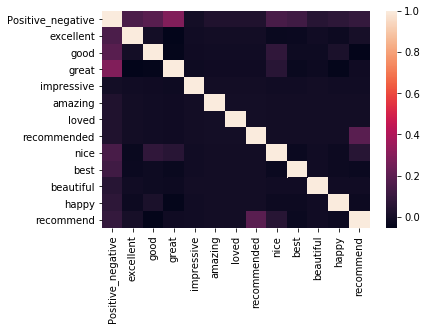

In [125]:
sns.heatmap(amazon_data.corr())

so we can see from the above heatmap that the independence assumption of the naive bayes is met.

therefore it is time to fit our model.But first lets define our data and target variables and the distribusion of the feature variables in this case is bernouli as we have only two categories in each feature.

In [126]:
data = amazon_data[keywords]
target = amazon_data['Positive_negative']

In [127]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 295


Finally lets check the above classifier on the other two datasets from yelp and imdb,but first lets load the two data sets.

In [128]:
imdb_data = pd.read_csv('imdb_labelled.txt', delimiter = '\t', header = None)
yelp_data = pd.read_csv('yelp_labelled.txt', delimiter = '\t', header = None)
imdb_data.columns = ['Reviews', 'Positive_negative']
yelp_data.columns = ['Reviews', 'Positive_negative']

In [129]:
import re
for key in keywords:
    imdb_data[key] = imdb_data.Reviews.apply(lambda x: bool(re.search(r'{}'.format(key), x, re.IGNORECASE)))
for key in keywords:
    yelp_data[key] = yelp_data.Reviews.apply(lambda x: bool(re.search(r'{}'.format(key), x, re.IGNORECASE)))    

In [130]:
data_imdb = imdb_data[keywords]
target_imdb = imdb_data['Positive_negative']
data_yelp = yelp_data[keywords]
target_yelp = yelp_data['Positive_negative']

so now lets fit the model and check what happens with the two datasets

In [132]:
bnb_imdb = BernoulliNB()
bnb_imdb.fit(data_imdb, target_imdb)
y_pred_imdb = bnb_imdb.predict(data_imdb)
print("Number of mislabelled points out of a total {} points in the imdb data is : {}".format(
    data_imdb.shape[0],   
    (target_imdb != y_pred_imdb).sum()
))
print('And the proportion of mislabelled is {}: '.format((target_imdb != y_pred_imdb).sum()/data_imdb.shape[0])) 

Number of mislabelled points out of a total 748 points in the imdb data is : 311
And the proportion of mislabelled is 0.4157754010695187: 


In [133]:
bnb_yelp = BernoulliNB()
bnb_yelp.fit(data_yelp, target_yelp)
y_pred_yelp = bnb_yelp.predict(data_yelp)
print("Number of mislabelled points out of a total {} points in the yelp data is : {}".format(
    data_yelp.shape[0],
    (target_yelp != y_pred_yelp).sum()
))
print('And the proportion of mislabelled is {}: '.format((target_yelp != y_pred_yelp).sum()/data_yelp.shape[0])) 

Number of mislabelled points out of a total 1000 points in the yelp data is : 319
And the proportion of mislabelled is 0.319: 
